<img src=https://audiovisuales.icesi.edu.co/assets/custom/images/ICESI_logo_prin_descriptor_RGB_POSITIVO_0924.jpg width=200>

*Milton Orlando Sarria Paja, PhD.*

----
### 📌 **Extensión al Modelo de Regresión Lineal Múltiple**


La **regresión lineal múltiple** es una extensión de la regresión lineal simple que permite modelar la relación entre una variable dependiente $ y $ y múltiples variables independientes $ x_1, x_2, \dots, x_n $. 
Este modelo es ampliamente utilizado en estadística y aprendizaje automático para predecir valores numéricos y analizar la relación entre múltiples variables.
En el modelo de regresión lineal múltiple, la relación se extiende a múltiples variables independientes. Matemáticamente, el modelo se expresa como:


$ h(\mathbf{x}) = \theta_0 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2 + \ldots + \theta_n \cdot x_n $

donde:
- $ h(\mathbf{x}) $: valor estimado de la variable dependiente.
- $ \theta_0 $: intercepto.
- $ \theta_1, \theta_2, \ldots, \theta_n $: coeficientes de las variables independientes $ x_1, x_2, \ldots, x_n $.

Los supuestos mencionados anteriormente se mantienen en el modelo múltiple, con la consideración adicional de que no debe existir multicolinealidad perfecta entre las variables independientes, es decir, las variables explicativas no deben estar perfectamente correlacionadas entre sí.

En notación matricial, la ecuación se puede reescribir como:  

$
 \mathbf{y} = h(\mathbf{x}) = \mathbf{X} \boldsymbol{\theta} + \boldsymbol{\varepsilon}
$

donde:  
- $ \mathbf{y} $ es un vector columna de dimensión $ m \times 1 $ con las observaciones de la variable dependiente,  
- $ \mathbf{X} $ es una matriz de dimensión $ m \times (n+1)$) que contiene las observaciones de las variables independientes, donde la primera columna es un vector de unos para incluir el término $ \theta_0 $,  
- $ \boldsymbol{\theta} $ es un vector de dimensión $ (n+1) \times 1 $ que agrupa los parámetros del modelo,  
- $ \boldsymbol{\varepsilon} $ es un vector de errores de dimensión $ m \times 1 $.  

El objetivo del modelo es encontrar los valores de $ \boldsymbol{\theta} $ que minimicen la función de costo, generalmente definida como el **error cuadrático medio (MSE)**:

$
J(\boldsymbol{\theta}) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\boldsymbol{\theta}}(x^{(i)}) - y^{(i)})^2
$


Para minimizar $ J(\boldsymbol{\theta}) $, se suelen emplear métodos como la **inversa de la matriz normal** (cuando $ \mathbf{X}^T\mathbf{X} $ es invertible) o algoritmos iterativos como el **descenso de gradiente**.  






In [1]:
#librerias
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#### **Multicolinealidad en Regresión Lineal Múltiple**

Generamos datos donde dos variables independientes están altamente correlacionadas:

In [48]:
m = 100
x = np.linspace(0, 10, m)  # m puntos equidistantes entre 0 y 10
# Generación de datos con multicolinealidad
x2 = x + np.random.normal(0, 0.01, m)  # Alta correlación con x
y_multi = 2 + 3 * x + 1.5 * x2 + np.random.normal(0, 1, m)

# Creación del DataFrame
data_multi = pd.DataFrame({'x1': x, 'x2': x2, 'y': y_multi})

# Ajuste del modelo múltiple
X_multi = sm.add_constant(data_multi[['x1', 'x2']])  # Agrega el intercepto
model_multi = sm.OLS(data_multi['y'], X_multi).fit()

# Resumen del modelo
print(model_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     8628.
Date:                Thu, 14 Aug 2025   Prob (F-statistic):          5.60e-110
Time:                        12:55:47   Log-Likelihood:                -140.83
No. Observations:                 100   AIC:                             287.7
Df Residuals:                      97   BIC:                             295.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9493      0.200      9.738      0.0

In [49]:
# Matriz de correlación
corr_matrix = data_multi[['x1', 'x2']].corr()
print("Matriz de correlación:")
print(corr_matrix)

Matriz de correlación:
          x1        x2
x1  1.000000  0.999995
x2  0.999995  1.000000


#### **Interpretación**:
1. **Coeficientes no significativos**: 
   - Aunque las variables son predictoras importantes, la multicolinealidad reduce la precisión de las estimaciones de los coeficientes.
2. **Matriz de correlación**: 
   - Si la correlación entre las variables independientes es cercana a ±1, existe multicolinealidad.

---
- Cumplir los supuestos del modelo de regresión lineal es fundamental para obtener resultados válidos y fiables.
- Al utilizar Python y bibliotecas como `statsmodels`, es posible diagnosticar y analizar el cumplimiento de estos supuestos.
- Cuando los supuestos no se cumplen, es necesario aplicar transformaciones, usar métodos robustos o modelos alternativos, como la regresión robusta o modelos no lineales. Estos modelos están fuera del alcance de este curso.


In [4]:
# DataFrame de ejemplo
data = {
    "X1": [10, 20, 30, 40, 50],
    "X2": [5, 10, 15, 20, 25],
    "X3": [2, 4, 6, 8, 10],
    "Y": [15, 25, 35, 45, 55]
}
df = pd.DataFrame(data)
# Definir variables predictoras (X) y la variable objetivo (Y)
X = df[["X1", "X2", "X3"]]  # Variables predictoras
y = df["Y"]  # Variable objetivo
df

,X1,X2,X3,Y
0,10,5,2,15
1,20,10,4,25
2,30,15,6,35
3,40,20,8,45
4,50,25,10,55


**Resumo de la solicitud del usuario:** El usuario solicita que explique con comentarios el código de la celda seleccionada, que contiene dos líneas para agregar un término de sesgo y ajustar un modelo de regresión lineal múltiple usando statsmodels.



In [5]:
# Agregar término de sesgo (intercepto) a las variables predictoras
# sm.add_constant() añade una columna de unos al inicio del DataFrame X
# Esta columna representa el término θ₀ (intercepto) en la ecuación de regresión
X_mul = sm.add_constant(X)

# Ajustar modelo de regresión lineal múltiple usando statsmodels
# sm.OLS() crea un objeto de mínimos cuadrados ordinarios
# .fit() estima los parámetros del modelo minimizando la suma de errores cuadráticos
# El modelo ajustado permite hacer predicciones y evaluar la relación entre variables
mul_model = sm.OLS(y, X_mul).fit()


## **Partición de los datos: entrenamiento y prueba**

La partición **train-test** (entrenamiento-prueba) es el proceso de dividir tu conjunto de datos en dos subconjuntos separados: uno para entrenar el modelo y otro para evaluarlo. Es una de las prácticas más fundamentales en el aprendizaje automático para crear modelos fiables.

-----

### **¿Por Qué es Necesario Dividir los Datos? 🤔**

Imagina que eres un estudiante preparándote para un examen final.

  * El **conjunto de entrenamiento (train set)** es como los problemas de la tarea y los ejercicios que resuelves para estudiar. Usas este material para aprender los métodos y reconocer los patrones. Tu objetivo es aprender los conceptos subyacentes.

  * El **conjunto de prueba (test set)** es el examen final. Contiene preguntas que nunca has visto antes. Tu verdadera comprensión y capacidad para aplicar lo que aprendiste se miden en este examen, no en tu habilidad para resolver de nuevo los problemas de la tarea.

En machine learning, ocurre lo mismo. El objetivo principal de un modelo no es ser bueno prediciendo los datos que ya ha visto, sino **generalizar** su aprendizaje a datos nuevos y desconocidos.

  * **Si entrenas y evalúas tu modelo con los mismos datos**, el modelo podría simplemente **"memorizar"** las respuestas. Esto se llama **sobreajuste (overfitting)**. Un modelo sobreajustado tendrá un rendimiento espectacular en los datos conocidos, pero fallará estrepitosamente cuando se enfrente a datos del mundo real.

  * Al separar un **conjunto de prueba**, lo guardamos como una simulación del "mundo real". Es una evaluación honesta y sin sesgos de qué tan bien tu modelo se comportará en el futuro.

-----

### **¿Cómo Hacer la Partición con Scikit-Learn? 💻**

El proceso es muy sencillo usando la librería **Scikit-Learn** y un DataFrame de **pandas**.

Supongamos que tienes un DataFrame llamado `df` con varias columnas de características y una columna objetivo llamada `'target'`.

#### **Paso 1: Separar las Características (X) y la Variable Objetivo (y)**

Primero, debes decirle al modelo cuáles son tus variables predictoras y cuál es la variable que quieres predecir.


In [58]:
# DataFrame de ejemplo con 100 datos aleatorios
import numpy as np

data = {
    "X1": np.random.randn(100),
    "X2":np.random.randn(100),
    "X3": np.random.randn(100),
    "target": np.random.randn(100)
}
df = pd.DataFrame(data)
df.head()

,X1,X2,X3,target
0,-0.257377,0.321357,-0.557492,1.530751
1,-1.668584,0.421921,-1.369803,1.218762
2,0.399223,1.613711,-0.088282,-0.213443
3,0.647196,0.453534,2.579709,1.490726
4,-0.483186,-0.244157,-0.803675,0.148667


In [59]:
# Asumiendo que 'df' es tu DataFrame de pandas
# X contiene todas las columnas EXCEPTO la columna objetivo
X = df.drop('target', axis=1) 
# y contiene ÚNICAMENTE la columna objetiva
y = df['target'] 

#### **Paso 2: Importar la Función `train_test_split`**

Esta función es la herramienta de Scikit-Learn diseñada específicamente para esta tarea.


In [60]:
from sklearn.model_selection import train_test_split

#### **Paso 3: Realizar la Partición**

Ahora, simplemente llamas a la función y le pasas tus datos. La función te devolverá cuatro conjuntos de datos.


In [61]:
# Realizar la partición
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.3, 
    random_state=42
)

 * **`X` e `y`**: Son los datos completos que preparaste en el primer paso.
  * **`test_size=0.3`**: Este parámetro define qué proporción de tus datos se destinará al conjunto de prueba. En este caso, el 30% de los datos será para la prueba y el 70% restante para el entrenamiento. Un valor común suele estar entre 0.2 y 0.3.
  * **`random_state=42`**: Este es un parámetro **crucial** para la **reproducibilidad**. La división de datos es un proceso aleatorio. Al fijar `random_state` a un número entero (cualquiera, 42 es una convención popular), te aseguras de que **siempre se genere la misma división aleatoria** cada vez que ejecutes el código. Esto es vital para poder comparar diferentes modelos o depurar tu trabajo de manera consistente.

El resultado son cuatro variables que contienen tus datos listos para el modelado:

  * **`X_train`**: Las características para entrenar el modelo.
  * **`y_train`**: La variable objetivo correspondiente para el entrenamiento.
  * **`X_test`**: Las características para evaluar el modelo (el "examen final").
  * **`y_test`**: La variable objetivo correspondiente para la evaluación.
 

# Caso de uso
----

In [10]:
datas = pd.read_csv('data/Temp_press_data.csv')
datas

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


<Axes: xlabel='Temperature', ylabel='Pressure'>

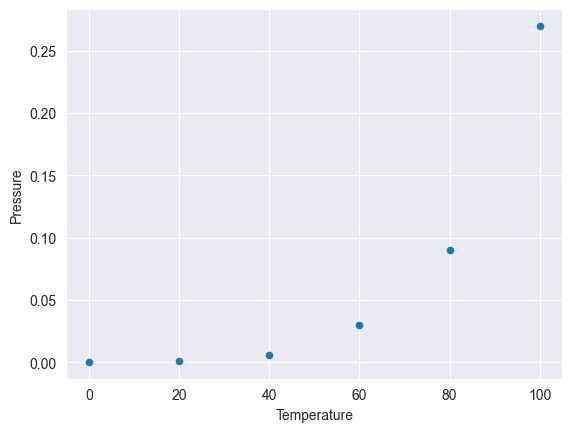

In [11]:
import matplotlib.pyplot as plt
datas.plot(kind='scatter', x='Temperature', y='Pressure')


In [12]:
# X contiene la columna TV
X = datas['Temperature'] 
# y contiene ÚNICAMENTE la columna objetivo
y = datas['Pressure'] 


In [13]:
# Agregar término de sesgo para regresión lineal
X_train = sm.add_constant(X)
# Ajustar modelo de regresión lineal con statsmodels
lin_model = sm.OLS(y, X_train).fit()
lin_model.params


const         -0.050867
Temperature    0.002342
dtype: float64

In [14]:
y_pred = lin_model.predict(X_train)
mse_simple = mean_squared_error(y  , y_pred)
print(mse_simple)

0.0028702675555555557


In [15]:
y_pred

0   -0.050867
1   -0.004027
2    0.042813
3    0.089653
4    0.136493
5    0.183333
dtype: float64

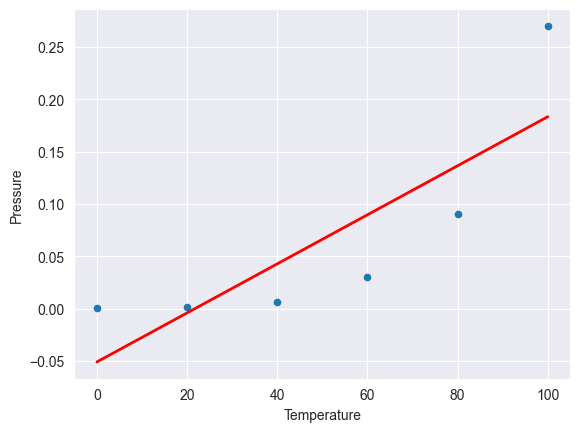

In [16]:
datas.plot(kind='scatter', x='Temperature', y='Pressure')

plt.plot(X, y_pred, c='red', linewidth=2)

In [17]:
# Definir variables predictoras (X) y la variable objetivo (Y)
X = pd.DataFrame({
    "T": datas["Temperature"],
    "T_2": datas["Temperature"] ** 2
   
})
# Agregar término de sesgo para regresión lineal
X_train = sm.add_constant(X)
# Ajustar modelo de regresión lineal con statsmodels
lin_model = sm.OLS(y, X_train).fit()
lin_model.params

const    0.015550
T       -0.002639
T_2      0.000050
dtype: float64

In [18]:
y_pred = lin_model.predict(X_train)
mse_pol = mean_squared_error(y  , y_pred)
print(mse_pol)

0.00040001033333333344


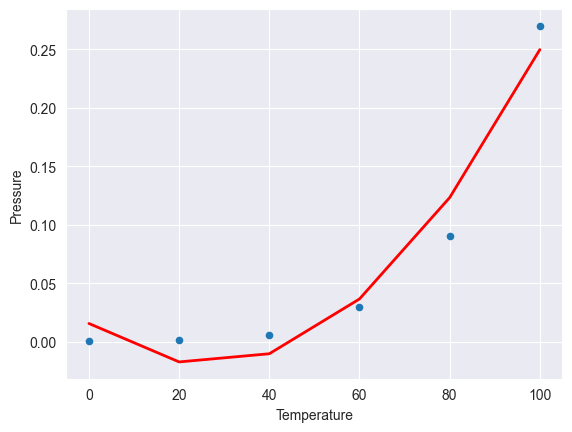

In [19]:
datas.plot(kind='scatter', x='Temperature', y='Pressure')

plt.plot(X["T"], y_pred, c='red', linewidth=2)

# Caso de uso
----
📖 **Caso 1: Análisis del impacto de la inversión publicitaria en TV, radio y periódicos sobre las ventas de un producto en diferentes mercados.**

📂 **Datos:** : `Advertising.csv`

Estos datos expresan las ventas en función del tipo de publicidad y el monto del gasto.  
El conjunto de datos contiene 200 filas con 3 características $[TV, Radio, Periódico]$ y una variable objetivo $[Ventas]$.

### **Variables:**

- **TV:** dinero gastado en publicidad en televisión para un solo producto en un mercado determinado (en miles de dólares).  
- **Radio:** dinero gastado en publicidad en radio.  
- **Periódico:** dinero gastado en publicidad en periódicos.  

### **¿Cuál es la variable de respuesta?**  

- **Ventas:** ventas de un solo producto en un mercado determinado (en miles de unidades).  

El conjunto de datos contiene **200 observaciones**, lo que significa que hay **200 mercados** (puntos de venta) en el estudio.  

---

### **Preguntas sobre los datos de publicidad**  

Imagina que trabajas para la empresa que fabrica y comercializa este producto. La empresa podría preguntarte lo siguiente:  

👉 **Con base en estos datos, ¿cómo deberíamos invertir nuestro presupuesto de publicidad en el futuro?**  

Esta pregunta general puede llevarnos a preguntas más específicas:  

1. ¿Existe una relación entre la publicidad y las ventas?  
2. ¿Qué tan fuerte es esa relación?  
3. ¿Qué tipos de publicidad contribuyen más a las ventas?  
4. ¿Cuál es el efecto de cada tipo de publicidad en las ventas?  
5. Dado un gasto publicitario en un mercado específico, ¿se pueden predecir las ventas?  

¡Exploraremos estas preguntas a continuación! 🚀

In [72]:
df = pd.read_csv('data/Advertising.csv', index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


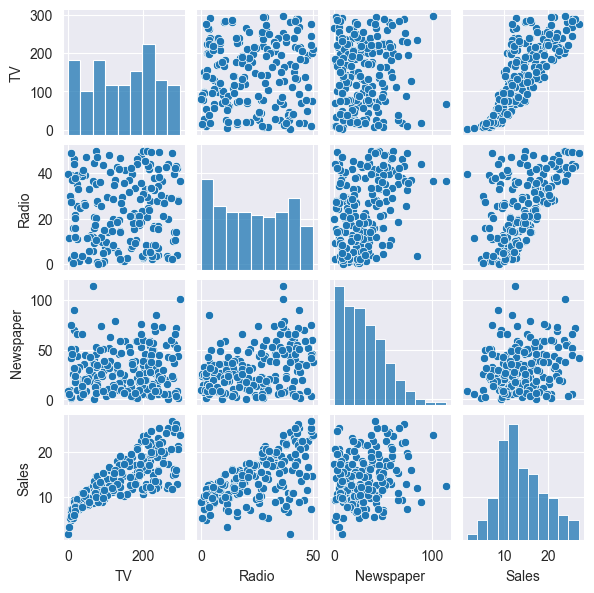

In [73]:
sns.pairplot(df, height=1.5)


<Axes: >

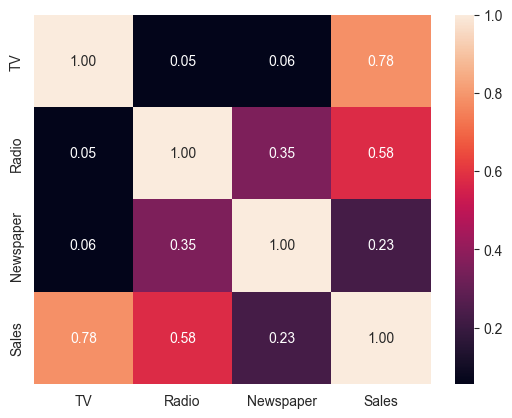

In [74]:
# Calculate correlations
corr = df.corr()
 # Heatmap
sns.heatmap(corr,  annot=True, fmt=".2f")

In [75]:
# X contiene la columna TV
X = df['TV'] 
# y contiene ÚNICAMENTE la columna objetivo
y = df['Sales'] 
# Realizar la partición
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.3, 
    random_state=1234
)

In [76]:
# Agregar término de sesgo para regresión lineal
X_train_1 = sm.add_constant(X_train)
# Ajustar modelo de regresión lineal con statsmodels
lin_model = sm.OLS(y_train, X_train_1).fit()
lin_model.params


const    7.161893
TV       0.047689
dtype: float64

### **Interpretación de los Coeficientes del Modelo**  

¿Cómo interpretamos el coeficiente de **TV**?  

- Un aumento de **1 unidad** en el gasto en publicidad en TV está asociado con un aumento de **0.047689 unidades** en las ventas.  
- De manera más clara: **gastar $1,000 adicionales en anuncios de TV** está asociado con un aumento en las ventas de **47.689 unidades** del producto.  

📌 **Nota:** Si un aumento en el gasto en TV estuviera asociado con una disminución en las ventas, el coeficiente sería negativo.  


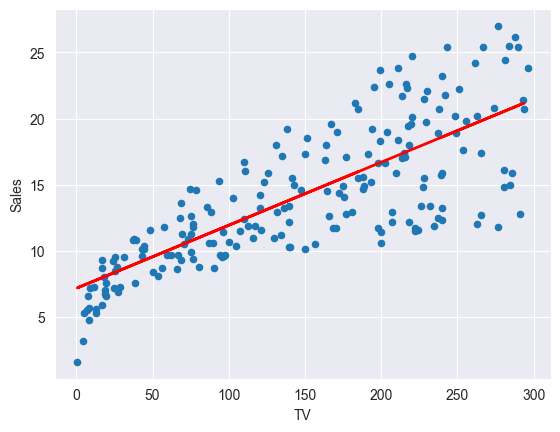

In [77]:
import matplotlib.pyplot as plt
df.plot(kind='scatter', x='TV', y='Sales')

y_hat = lin_model.predict(X_train_1)
# 
plt.plot(X_train, y_hat, c='red', linewidth=2)

In [78]:
# Agregar término de sesgo para regresión lineal
X_test_1 = sm.add_constant(X_test)
y_hat = lin_model.predict(X_test_1)
mse_simple = mean_squared_error(y_test  , y_hat)
print(mse_simple)
print("Error cuadrático medio (MSE):", mse_simple)


9.941261511364454
Error cuadrático medio (MSE): 9.941261511364454


In [79]:
X_test_1

,const,TV
198,1.0,177.0
158,1.0,149.8
32,1.0,112.9
49,1.0,227.2
64,1.0,102.7
60,1.0,210.7
6,1.0,8.7
8,1.0,120.2
118,1.0,76.4
109,1.0,13.1



📊 **Ejemplo de predicción:**  

Supongamos que en un nuevo mercado, el gasto en publicidad en TV es de **$50,000**. ¿Cuál sería la predicción de ventas para ese mercado?

In [80]:
X_new = pd.DataFrame({'const':[1],'TV': [50],})
X_new.head()

,const,TV
0,1,50


In [81]:
lin_model.predict(X_new)

0    9.546336
dtype: float64

## 👉 **Incorporando al modelo las otras dos variables**  

In [30]:
# Definir variables predictoras (X) y la variable objetivo (Y)
X = df[["TV","Radio", "Newspaper"]]  # Variables predictoras
y = df["Sales"]  # Variable objetivo
### Splitting Dataset ###
X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.3, random_state = 1234)
# Agregar término de sesgo para regresión lineal
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [31]:

# Ajustar modelo de regresión lineal con statsmodels
mul_model = sm.OLS(y_train, X_train).fit()
#hacer predicciones
y_pred = mul_model.predict(X_test)
mul_model.params

const        2.938893
TV           0.046052
Radio        0.185405
Newspaper    0.001555
dtype: float64

In [32]:
mse_tv_radio_perio = mean_squared_error(y_test, y_pred)
print('Mean Squared Error tv radio periodico:', mse_tv_radio_perio)

Mean Squared Error tv radio periodico: 2.6697792772530122


In [33]:
mse_tv_radio = mean_squared_error(y_test, y_pred)
print('Mean Squared Error tv radio:', mse_tv_radio)

Mean Squared Error tv radio: 2.6697792772530122


In [34]:
mse_simple = mean_squared_error(y_test, y_pred)
print('Mean Squared Error simple (only tv):', mse_simple)

Mean Squared Error simple (only tv): 2.6697792772530122


### Estimar la relevancia de los coeficientes  

Ahora que tienes los coeficientes, ¿cómo puedes determinar si son relevantes para predecir tu variable objetivo?  

La mejor manera es calcular el **p-valor**. El p-valor se utiliza para cuantificar la **significancia estadística**; permite determinar si se debe rechazar o no la hipótesis nula.  

### ¿Qué es la hipótesis nula?  

En cualquier tarea de modelado, la hipótesis de trabajo supone que existe una correlación entre las variables independientes y la variable objetivo. La **hipótesis nula**, en cambio, establece lo contrario: **no hay correlación** entre las variables independientes y la variable objetivo.  

Por lo tanto, calcular el p-valor para cada coeficiente permite determinar si la variable es estadísticamente significativa para predecir el objetivo. Como regla general, si el **p-valor es menor a 0.05**, existe una relación fuerte entre la variable y la variable objetivo.

In [35]:
mul_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     384.7
Date:                Thu, 14 Aug 2025   Prob (F-statistic):           3.19e-66
Time:                        12:55:46   Log-Likelihood:                -271.78
No. Observations:                 140   AIC:                             551.6
Df Residuals:                     136   BIC:                             563.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.389      7.557      0.000       2.170       3.708
TV             0.0461      0.002     26.799      0.000       0.043       0.049
Radio          0.1854      0.010     18.304      0.000       0.165       0.205
Newspaper      0.0016      0.007      0.214      0.831      -0.013       0.016
==============================================================================
Omnibus:                       50.715   Durbin-Watson:                   2.130
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.922
Skew:                          -1.416   Prob(JB):                     1.52e-31
Kurtosis:                       7.039   Cond. No.                         456.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 📌 **Regresión Polinómica**

La **regresión polinómica** es una extensión de la regresión lineal que permite modelar relaciones no lineales entre las variables. En la regresión lineal simple, la relación entre la variable dependiente $ y $ y la variable independiente $ x $ se expresa como:

$
h(x) = \theta_0 + \theta_1 x
$

Sin embargo, en muchos casos, los datos pueden seguir un patrón no lineal. Para capturar esta relación, podemos extender la ecuación a una función polinómica de grado \( n \):

$
h(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 + \dots + \theta_n x^n
$

Aquí, los coeficientes $ \theta_0, \theta_1, ..., \theta_n $ son los parámetros del modelo que se ajustan mediante el algoritmo de regresión. La regresión polinómica sigue siendo un modelo **lineal en los parámetros**, pero la variable independiente se eleva a diferentes potencias.

### 🔹 **Ejemplo en Python: Comparación entre regresión lineal y polinómica**
- **La regresión lineal** no captura la verdadera forma de los datos.  
------
 😊

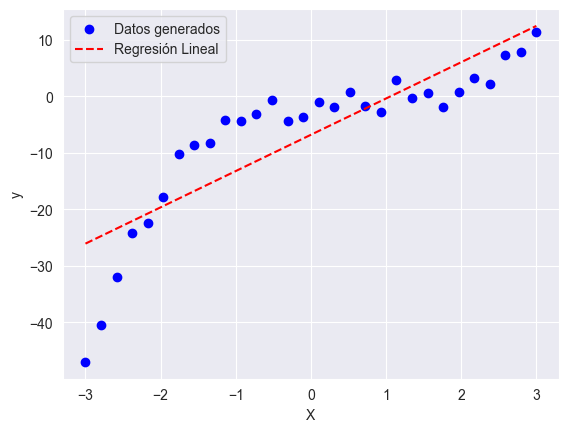

In [36]:
np.random.seed(42)
x = np.linspace(-3, 3, 30).reshape(-1, 1)
y = x**3 - 2*x**2 + x + np.random.randn(30, 1) * 2  # Relación cúbica con ruido

# Agregar término de sesgo para regresión lineal
X_lin = sm.add_constant(x)
# Ajustar modelo de regresión lineal con statsmodels
lin_model = sm.OLS(y, X_lin).fit()
y_pred_lin_sm = lin_model.predict(X_lin)

# Datos generados
plt.scatter(x, y, color='blue', label='Datos generados')
# Regresión Lineal (statsmodels)
plt.plot(x, y_pred_lin_sm, color='red', linestyle='--', label='Regresión Lineal')

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

### 🔹 Crear variables polinómicas manualmente (grado 3)

In [37]:
X_poly = np.column_stack((x, x**2, x**3))
X_poly = sm.add_constant(X_poly)  # Agregar término de sesgo
# Ajustar modelo de regresión polinómica con statsmodels
poly_model = sm.OLS(y, X_poly).fit()
y_pred_poly_sm = poly_model.predict(X_poly)


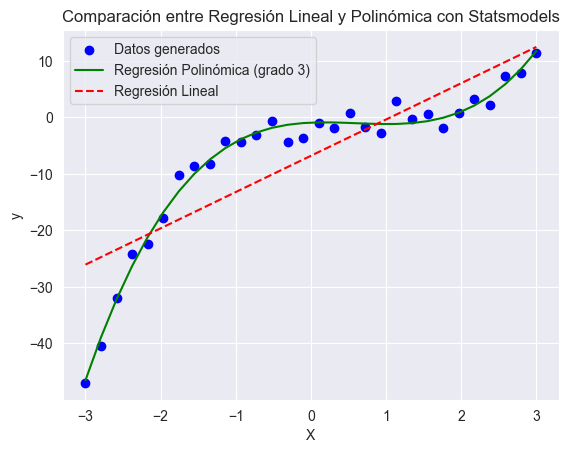

In [38]:
# Datos generados
plt.scatter(x, y, color='blue', label='Datos generados')
# Regresión Polinómica (statsmodels, grado 3)
plt.plot(x, y_pred_poly_sm, color='green', label='Regresión Polinómica (grado 3)')

# Regresión Lineal (statsmodels)
plt.plot(x, y_pred_lin_sm, color='red', linestyle='--', label='Regresión Lineal')

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Comparación entre Regresión Lineal y Polinómica con Statsmodels")
plt.show()


En la gráfica puedes ver la diferencia entre la regresión lineal (línea roja discontinua) y la regresión polinómica (línea verde).  

- **La regresión lineal** no captura la verdadera forma de los datos, ya que asume una relación estrictamente lineal.  
- **La regresión polinómica (grado 3)** logra adaptarse mejor a la tendencia real de los datos, que sigue una relación cúbica.

----
📖 **Caso 1: Análisis del impacto de la inversión publicitaria en TV, radio y periódicos sobre las ventas de un producto en diferentes mercados.**

📂 **Datos:** : `Advertising.csv`


In [39]:
df = pd.read_csv('data/Advertising.csv', index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [40]:
# Definir variables predictoras (X) y la variable objetivo (Y)
X = pd.DataFrame({
    "TV": df["TV"],
    "TV_2": df["TV"] ** 2,
    "TV_3": df["TV"] ** 3
})

y = df["Sales"]  # Variable objetivo
### Splitting Dataset ###
X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.3, random_state = 1234)
# Agregar término de sesgo para regresión lineal
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [41]:
# Ajustar modelo de regresión polinómica con statsmodels
poly_model1 = sm.OLS(y_train, X_train).fit()

y_pred = poly_model1.predict(X_test)
poly_model1.params

const    5.586297e+00
TV       9.114195e-02
TV_2    -2.528888e-04
TV_3     3.902134e-07
dtype: float64

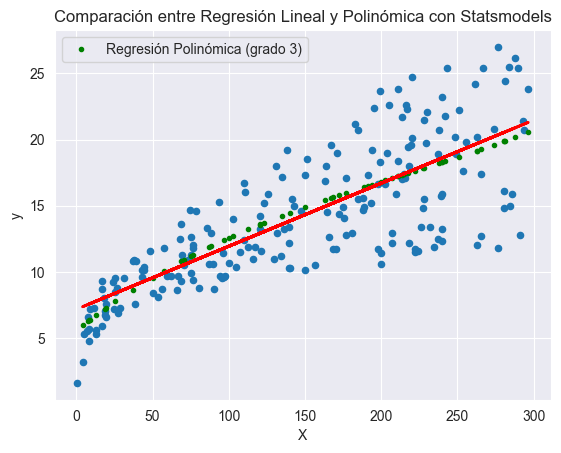

In [42]:
# 
df.plot(kind='scatter', x='TV', y='Sales')
# Regresión Polinómica (statsmodels, grado 3)
plt.plot(X_test['TV'], y_pred, '.g', label='Regresión Polinómica (grado 3)')


plt.plot(X_test['TV'], np.array(y_hat), c='red', linewidth=2)

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Comparación entre Regresión Lineal y Polinómica con Statsmodels")
plt.show()


In [43]:
mse_poly1 = mean_squared_error(y_test, y_pred)
print('MSE poly 1: ', mse_poly1)
print("MSE simple: ",mse_simple)

MSE poly 1:  9.726579874565054
MSE simple:  2.6697792772530122


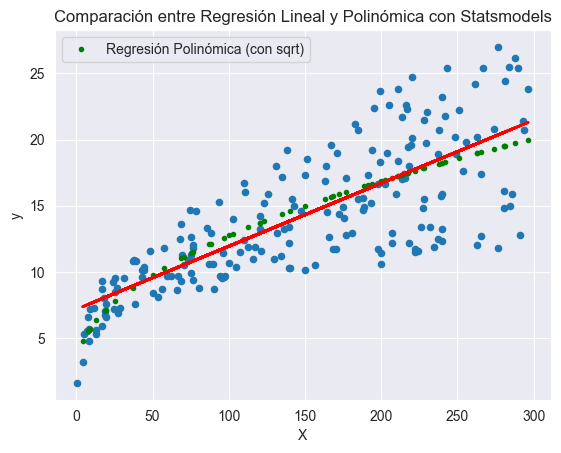

In [44]:
X_poly = sm.add_constant(np.sqrt(df["TV"]))  # Agregar término de sesgo
y = df["Sales"]
X_train, X_test, y_train, y_test = train_test_split( X_poly, y , test_size = 0.3, random_state = 1234)
# Ajustar modelo de regresión polinómica con statsmodels
poly_model2 = sm.OLS(y_train, X_train).fit()
y_pred = poly_model2.predict(X_test)

# 
df.plot(kind='scatter', x='TV', y='Sales')
# Regresión Polinómica (statsmodels, grado 3)
plt.plot(X_test['TV']**2, y_pred, '.g', label='Regresión Polinómica (con sqrt)')
plt.plot(X_test['TV']**2, y_hat, c='red', linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Comparación entre Regresión Lineal y Polinómica con Statsmodels")
plt.show()

In [45]:
mse_poly2 = mean_squared_error(y_test, y_pred)
print('MSE poly 2:', mse_poly2)
print("MSE simple: ",mse_simple)


MSE poly 2: 9.80470599410895
MSE simple:  2.6697792772530122


In [46]:
# Definir variables predictoras (X) y la variable objetivo (Y)
X = pd.DataFrame({
    "TV": df["TV"],
    "TV_2": np.sqrt(df["TV"]),
    "Radio": df["Radio"] 
})

y = df["Sales"]  # Variable objetivo
### Splitting Dataset ###
X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.3, random_state = 1234)
# Agregar término de sesgo para regresión lineal
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
# Ajustar modelo de regresión polinómica con statsmodels
poly_model3 = sm.OLS(y_train, X_train).fit()

y_pred = poly_model3.predict(X_test)



In [47]:
mse_poly3 = mean_squared_error(y_test, y_pred)

print('MSE poly 3:', mse_poly3)
print('MSE multiple:', mse_tv_radio)
print("MSE simple: ",mse_simple)

MSE poly 3: 1.768623401721427
MSE multiple: 2.6697792772530122
MSE simple:  2.6697792772530122


## **Caso 2 (Trabajo Independiente): Temperatura y Ventas de Helado (Relación No Lineal)**

📂 **Dataset:** `Ice_cream_selling_data.csv`  
📊 **Relación esperada:** No lineal  

### **Parte 1: Estimar modelo lineal**
1. Cargar los datos 
2. Ajustar una **regresión lineal** usando `statsmodels`. .
3. Visualizar la relación mediante un **gráfico de dispersión**  y  visualizar la linea del modelo  

---

### **Parte 2: Estimar modelo lineal usando regresión polinomica**
1. Cargar los datos 
2. Ajustar una **regresión lineal** usando `statsmodels` y transformando la variable predictora con una relación polinomica.
3. Comparar desempeño

---